# Adversarial Search: Playing Dots and Boxes


## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play the game Dots and Boxes:

> "Dots and Boxes is a pencil-and-paper game for two players. The game starts with an empty grid of dots. Usually two players take turns adding a single horizontal or vertical line between two unjoined adjacent dots. A player who completes the fourth side of a 1x1 box earns one point and takes another turn. A point is typically recorded by placing a mark that identifies the player in the box, such as an initial. The game ends when no more lines can be placed. The winner is the player with the most points. The board may be of any size grid." (see [Dots and Boxes on Wikipedia](https://en.wikipedia.org/wiki/Dots_and_Boxes))

You can play Dots and Boxes [here](https://www.math.ucla.edu/~tom/Games/dots&boxes.html).

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

Initial state: an empty n × n board
actions: a player draws one vertical or horizontal line between two dots on the board.
Transition model: S × A → S' or,
                  results(s,a) = s'.
Test for terminal state: In the dots and boxes game a terminal state is reached when no more lines can be placed.
Utility for terminal states: Win = 1, Draw = 0, Loss = -1

Given an m × n board, the number of lines that can be placed is m*(n + 1) + n*(m + 1), with a state space of 2^(number of lines). For a 3x3 board, 24 lines could be placed, and the state space would be or 2^24, or 24 combinations of binary choices.


How big is the game tree that minimax search will go through? Give an estimate and explain it.

Minmax search uses Depth First Search to look at all possible game states, which has a runtime of n!. The reason why it is n! is because there are 24 states that exist on an empty board, and after one is placed there are 23 more combinations for each of the 24 states, and then 22, and so on and so forth, and since they each branch exponentially, they are all multiplied. So for our 3x3 board, that gives us an astronomically large number, 6.2e23. There is no need to use minimax search because the actual state space is only 1.6e7, as many of the states in the minmax search are duplicates of other states.

## Task 2: Game Environment and Random Agent [30 point]

You need to think about a data structure to represent the board meaning he placed lines and who finished what box. There are many options. Let's represent the board using a simple dictionary where `n` and `m` represents the number of dots horizontaly and vertically, respectively. Everybody needs to use the same representation so we can let agents play against each other later. 

In [145]:
board = {
    'n': 4, ### hoizontal dots
    'm': 4 ### vertical dots
}
def draw_line(board, orientation, row, col):
    """
    Place a line on an exiting board.

    Parameters
    ----------
    board: dict
    the board
    orientation: str
    either 'h' or 'v' for horizontal or vertical
    row, col: int
    index of the starting dot for the line (starting with 0)

    """

    if orientation not in ['h', 'v']:
        return False

    if row < 0 or col < 0:
        return False
    if (row >= (board['n'] - 1) and (orientation == 'v')) or (col >= (board['m']-1) and (orientation == 'h')):
        return False


    if (orientation, row, col) in board:
        return False

    board[(orientation, row, col)] = True
    return True

print(draw_line(board, "h", 1, 1))
print(draw_line(board, "v", 1, 1))
# this hould not work
board

True
True


{'n': 4, 'm': 4, ('h', 1, 1): True, ('v', 1, 1): True}

Write code to display the board. **Bonus point: Post your visualization code with an example output to the discussion board. The best visualization will earn you bonus participation points in this class.**

In [146]:
# using visualization code posted by Edward Jiang
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
import random
def show_board(board, score):
    # here is my code to show board
    # black is the background color, number as 0
    # blue is the dot color, number as 1
    # orange is the line color, number as 2
    # we assume the dots are 0 indexed, aka starts at 0
    cmap = colors.ListedColormap(['black', 'blue','orange',"red","yellow"])
    hdot = board["n"]
    vdot = board["m"]
    # get vertical and horizontal size
    np_board = np.zeros( (hdot + (hdot-1)*3, vdot + (vdot-1)*3) , dtype=np.int64)
    # convert the board to an np matrix
    # we assume each dot is size of 1, each line occupies 3 index
    for i in range(np_board.shape[0]):
        if i%4==0:
            for j in range(np_board.shape[1]):
                if j%4==0:
                    np_board[i][j] = 1
    # all divisor of 4 is a dot
    for key in board:
    # draw lines
        if key != "n" and key !="m" and key:
    # print(key)
            if key[0] =="h":
    # print("horizontal line")
                for idx in range(key[2]*4+1, key[2]*4+4):
                    np_board[key[1]*4][idx] =2
            elif key[0] =="v":
    # print("vertical line")
                for idx in range(key[1]*4+1, key[1]*4+4):
                    np_board[idx][key[2]*4] =2

        else:
            print("not known")
    # draw squares by players
    # score is a dict with p1 and p2 as keys and list of occupied squares (int) as values
    # the squares are also zeroth index
    # for example, in a 3x3 board we will have
    # 0 1 2
    # 3 4 5
    # 6 7 8
    score_p1 = score["p1"]
    score_p2 = score["p2"]
    for idx in score_p1:
        row = idx// (hdot-1)*4+1
        col = idx% (vdot-1)*4+1
        for l in range(row,row+3):
            for k in range(col, col+3):
                np_board[l][k]=3
    for idx in score_p2:
        row = idx// (hdot-1)*4+1
        col = idx% (vdot-1)*4+1
        for l in range(row,row+3):
            for k in range(col, col+3):
                np_board[l][k]=4

    fig, ax = plt.subplots()
    ax.imshow(np_board, cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N + 1)), cmap.N))
    plt.show()
# display the plot

True
True
False
False
True
False
True
not known
not known


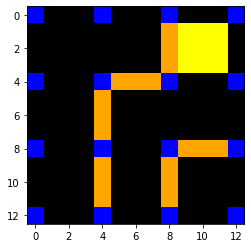

In [147]:
score = {"p1":[],"p2":[random.randrange(8)]}
for i in range(7):
    print(draw_line(board, np.random.choice(["v","h"]), random.randrange(board["n"]), random.randrange(board["m"])))
show_board(board,score)


True
not known
not known


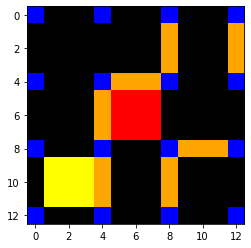

In [148]:
print(draw_line(board, "v", 0, 3))
score = {"p1":[random.randrange(8)],"p2":[random.randrange(8)]}
show_board(board,score)

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

Make sure that all these functions work with boards of different sizes (number of columns and rows as stored in the board).

In [241]:
import copy
from copy import deepcopy

def result(board,player,move,score):
    new_copy = copy.deepcopy(board)
    new_score = copy.deepcopy(score)
    draw_line(new_copy,move[0],move[1],move[2])
    getScore(new_copy,player,new_score)
    return new_copy,new_score

def util(board,player,score):
    out = isWin(board,player,score)
    if out == "Draw":
        return 0
    if not out:
        return -1
    if out:
        return 1
    # print("not terminal")
    return None

def isTerminal(board):
    rows = board["n"]
    col = board["m"]
    isTerminal = False
    testBoard = copy.deepcopy(board)
    for i in range(0,rows):
        for j in range(0,col):
            if draw_line(testBoard, "v", i, j):
                return isTerminal
            if draw_line(testBoard, "h", i, j):
                return isTerminal
    isTerminal = True
    return isTerminal

def isWin(board,player,score):
    if isTerminal(board) == False:
        return "Not a terminal state"
    if len(score["p1"]) == len(score["p2"]):
        return "Draw"
    current = player
    opp = other(player)
    if len(score[current]) > len(score[opp]):
        return True
    return False

def actions(board):
    rows = board["n"]
    col = board["m"]
    actions = []
    testBoard = copy.deepcopy(board)
    for i in range(0,rows):
        for j in range(0,col):
            if draw_line(testBoard, "v", i, j):
                actions.append(("v",i,j))
            if draw_line(testBoard, "h", i, j):
                actions.append(("h",i,j))
    return actions

def getScore(board,currPlayer,score):
    rows = board["n"]
    col = board["m"]
    current = currPlayer
    num_dot = 0
    testBoard = copy.deepcopy(board)
    for i in range(0,rows-1):
        for j in range(0,col-1):
            if not draw_line(testBoard, "h", i, j):
                if not draw_line(testBoard, "v", i, j):
                    if not draw_line(testBoard, "h", i + 1, j):
                        if not draw_line(testBoard, "v", i, j + 1):
                            if num_dot not in score["p1"] and num_dot not in score["p2"]:
                                score[current].append(num_dot)
            testBoard = copy.deepcopy(board)
            num_dot = num_dot + 1
    return None


def other(player):
    if player == "p1":
        return "p2"
    else:
        return "p1"

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on bt yhe environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [272]:
import random
def random_player(board, player,score):
    possibleMoves = actions(board)
    action = random.choice(possibleMoves)

    return action,None

In [273]:
def my_environment(player1,player2,rows,cols,score):
    board = {
        'n': rows, ### hoizontal dots
        'm': cols ### vertical dots
    }


    currPlayer = "p1"
    while not isTerminal(board):
        scoreBeforeTurn = len(score[currPlayer])
        isBoxCreated = False
        if currPlayer == "p1":
            currAgent = player1
        else:
            currAgent = player2

        action = currAgent(board,currPlayer,score)
        move = action[0]
        draw_line(board,move[0],move[1],move[2])
        getScore(board,currPlayer,score)
        newScore = len(score[currPlayer])
        if newScore == scoreBeforeTurn:
            if currPlayer == "p1":
                currPlayer = "p2"
            else:
                currPlayer = "p1"
        else:
            currPlayer = currPlayer
    # show_board(board,score)
    outcome = isWin(board,"p1",score)
    return outcome

In [250]:
score = {"p1":[],"p2":[]}
outcome = my_environment(random_player,random_player,4,4,score)
print(outcome)

True


Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [251]:
wins = 0
losses = 0
draw = 0
for i in range(0,1000):
    score = {"p1":[],"p2":[]}
    outcome = my_environment(random_player,random_player,4,4,score)
    if outcome:
        wins = wins + 1
    if not outcome:
        losses = losses + 1
    if outcome == "Draw":
        draw = draw + 1
print("Wins:", wins, "Losses:", losses, "Draw:", draw)

Wins: 521 Losses: 479 Draw: 0


## Task 3: Minimax Search with Alpha-Beta Pruning [30 points]

### Implement the search starting.

Implement the search starting from a given board and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__ 
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for larger board may be too large. You can experiment with smaller boards.

In [252]:
# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0
def alpha_beta_search(board, player,score):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    value, move = max_value_ab(board, player, -math.inf, +math.inf,score)
    if DEBUG >= 2: print(f"Number of nodes searched: {COUNT}")

    return move, value
def max_value_ab(state, player, alpha, beta,score):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1

    # return utility of state is a terminal state
    #print(player)
    #print(score)
    v = util(state, player,score)
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None:
        if DEBUG >= 2: print(f" found terminal state. backtracking.")
        return v, None

    v, move = -math.inf, None
    # check all possible actions in the state, update alpha and return move with the largest value
    for a in actions(state):
        new_state = result(state, player, a,score)

        v2, a2 = min_value_ab(new_state[0], player, alpha, beta,new_state[1])

        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 > v:
            v, move = v2, a
        alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f" v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

        return v, move
def min_value_ab(state, player, alpha, beta,score):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1

    # return utility of state is a terminal state

    v = util(state, player,score)

    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None:
        if DEBUG >= 2: print(f" found terminal state. backtacking.")
        return v, None

    v, move = +math.inf, None
    # check all possible actions in the state, update beta and return move with the smallest value
    for a in actions(state):
    #print(player,'in min')

        new_state = result(state, other(player), a,score)

        v2, a2 = max_value_ab(new_state[0], player, alpha, beta,new_state[1])
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 < v:
            v, move = v2, a
        beta = min(beta, v)
        if v <= alpha:
            if DEBUG >= 2: print(f" v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
    return v, move

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

not known
not known


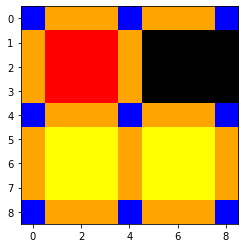

False



(None, 1)

Wall time: 4.99 ms


In [253]:
#finds move to tie
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[0],"p2":[2,3]}
draw_line(board,"h",1,1)
draw_line(board,"v",0,0)
draw_line(board,"v",1,2)
draw_line(board,"h",0,0)
draw_line(board,"h",0,1)
draw_line(board,"h",2,0)
draw_line(board,"v",1,1)
draw_line(board,"h",1,0)
draw_line(board,"v",0,1)
draw_line(board,"v",1,0)
draw_line(board,"h",2,1)
show_board(board,score)
test = isTerminal(board)
print(test)
print()
%time display(alpha_beta_search(board,"p1",score))

not known
not known


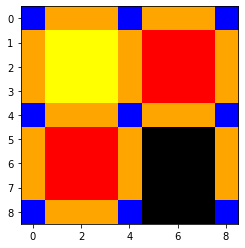

(None, 1)

Wall time: 2 ms


In [264]:
#finds winning move
testBoard = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[2,1],"p2":[0]}
draw_line(testBoard,"h",1,0)
draw_line(testBoard,"h",0,0)
draw_line(testBoard,"v",0,0)
draw_line(testBoard,"v",1,0)
draw_line(testBoard,"h",2,0)
draw_line(testBoard,"v",1,1)
draw_line(testBoard,"h",0,1)
draw_line(testBoard,"h",1,1)
draw_line(testBoard,"v",0,2)
draw_line(testBoard,"v",1,2)
draw_line(testBoard,"v",0,1)
show_board(testBoard,score)
print()
%time display(alpha_beta_search(testBoard,"p1",score))

not known
not known


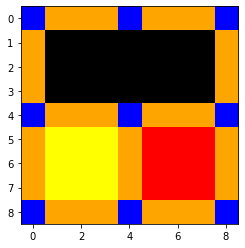

(None, 1)

Wall time: 3 ms


In [265]:
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[3],"p2":[2]}
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
draw_line(board,"v",1,2)
draw_line(board,"v",1,0)
draw_line(board,"h",2,1)
draw_line(board,"h",0,0)
draw_line(board,"h",2,0)
draw_line(board,"v",0,2)
draw_line(board,"h",1,1)
draw_line(board,"v",1,1)
draw_line(board,"h",0,1)
show_board(board,score)
print()
%time display(alpha_beta_search(board,"p1",score))

not known
not known


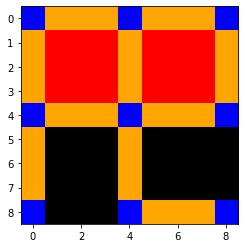

(None, 1)

Wall time: 2 ms


In [256]:
#finds tying move
board = {
'n': 3, ### hoizontal dots
'm': 3 ### vertical dots
}
score = {"p1":[0,1],"p2":[]}
draw_line(board,"h",1,1)
draw_line(board,"h",2,1)
draw_line(board,"v",0,2)
draw_line(board,"v",1,1)
draw_line(board,"h",0,1)
draw_line(board,"v",1,0)
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
draw_line(board,"v",0,1)
show_board(board,score)
print()
%time display(alpha_beta_search(board,"p2",score))

not known
not known


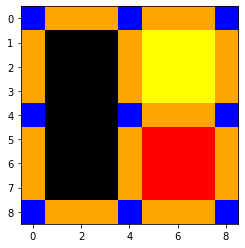

(None, 1)

Wall time: 2.99 ms


In [257]:
#finds winning move for p2
testBoard = {
'n': 3, ### hoizontal dots
'm': 3 ### vertical dots
}
score = {"p1":[3],"p2":[1]}
draw_line(testBoard,"h",2,0)
draw_line(testBoard,"v",0,2)
draw_line(testBoard,"v",1,2)
draw_line(testBoard,"h",0,1)
draw_line(testBoard,"v",1,0)
draw_line(testBoard,"v",1,1)
draw_line(testBoard,"h",1,1)
draw_line(testBoard,"h",2,1)
draw_line(testBoard,"h",0,0)
draw_line(testBoard,"v",0,0)
draw_line(testBoard,"v",0,1)
show_board(testBoard,score)
print()
%time display(alpha_beta_search(testBoard,"p2",score))

How long does it take to make a move? Start with a smaller board make the board larger. What is the largest board you can solve?

not known
not known


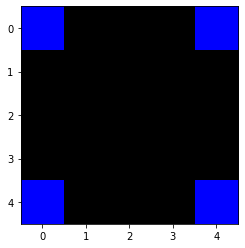

(None, 1)

Wall time: 2 ms


In [258]:
testval = 2
testBoard = {
'n': testval, ### hoizontal dots
'm': testval ### vertical dots
}
score = {"p1":[],"p2":[]}
show_board(testBoard,score)
print()
%time display(alpha_beta_search(testBoard,"p1",score))

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [259]:
#I've decided that moves placed along the edge of the board are better at the start of games. So I will be giving all moves
# at the edges of the board a higher priority
def orderActions(board):
    rows = board["n"]
    col = board["m"]
    actions = []
    testBoard = copy.deepcopy(board)
    for i in range(0,rows):
        for j in range(0,col):
            if(draw_line(testBoard,"v",i,j) == True):
                actions.append(("v",i,j))
            if(draw_line(testBoard,"h",i,j) == True):
                actions.append(("h",i,j))

    for i in actions:
        if i[0] == "h":
            if i[1] == 0 or i[1] == (rows - 1):
                actions.insert(0, actions.pop(actions.index(i)))
        if i[0] == "v":
            if i[2] == 0 or i[2] == (col - 1):
                actions.insert(0, actions.pop(actions.index(i)))
    # print(actions)
    # print('-------')


    return actions

In [261]:
# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0
def alpha_beta_search_move_order(board, player,score):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0

    value, move = max_value_ab(board, player, -math.inf, +math.inf,score)

    if DEBUG >= 2: print(f"Number of nodes searched: {COUNT}")

    return move, value
def max_value_ab(state, player, alpha, beta,score):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1

    # return utility of state is a terminal state
    #print(player)
    #print(score)
    v = util(state, player,score)
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None:
        if DEBUG >= 2: print(f" found terminal state. backtracking.")
        return v, None

    v, move = -math.inf, None
    # check all possible actions in the state, update alpha and return move with the largest value
    for a in orderActions(state):
        new_state = result(state, player, a,score)

        v2, a2 = min_value_ab(new_state[0], player, alpha, beta,new_state[1])

        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f" v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

    return v, move

def min_value_ab(state, player, alpha, beta,score):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1

    # return utility of state is a terminal state

    v = util(state, player,score)

    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None:
        if DEBUG >= 2: print(f" found terminal state. backtacking.")
        return v, None

    v, move = +math.inf, None
    # check all possible actions in the state, update beta and return move with the smallest value
    for a in orderActions(state):
        #print(player,'in min')

        new_state = result(state, other(player), a,score)

        v2, a2 = max_value_ab(new_state[0], player, alpha, beta,new_state[1])
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 < v:
            v, move = v2, a
        beta = min(beta, v)
        if v <= alpha:
            if DEBUG >= 2: print(f" v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move

    return v, move

not known
not known


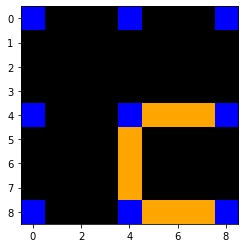


                   board size AVG time in milliseconds over 10 runs
normalActionsList         3x3                   0.17379999917466193
orderedActionsList        3x3                   0.07624999852851033


In [262]:
import timeit
import pandas as pd
import numpy as np
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[],"p2":[]}
draw_line(board,"h",1,1)
draw_line(board,"v",1,1)
draw_line(board,"h",2,1)
show_board(board,score)
print()
N = 2
tm = timeit.timeit('for i in range(2): alpha_beta_search_move_order(board,"p1",score)',
                   globals = globals(), number = N)
timing = tm/N * 1e3
orderedActionsList = ['3x3',timing]
tm = timeit.timeit('for i in range(2): alpha_beta_search(board,"p1",score)',
                   globals = globals(), number = N)
timing = tm/N * 1e3
normalActionsList = ['3x3',timing]
array = np.array([normalActionsList, orderedActionsList])
index_values = ['normalActionsList', 'orderedActionsList']
column_values = ['board size', 'AVG time in milliseconds over 10 runs']
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

not known
not known


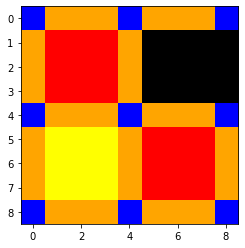


                   board size AVG time in milliseconds over 10 runs
normalActionsList         3x3                   0.13779999426333234
orderedActionsList        3x3                   0.15874999371590093


In [263]:
import timeit
import pandas as pd
import numpy as np
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[0,3],"p2":[2]}
draw_line(board,"h",1,1)
draw_line(board,"v",1,2)
draw_line(board,"h",0,0)
draw_line(board,"v",1,1)
draw_line(board,"h",2,1)
draw_line(board,"v",0,0)
draw_line(board,"v",1,0)
draw_line(board,"h",0,1)
draw_line(board,"h",2,0)
draw_line(board,"h",1,0)
draw_line(board,"v",0,1)
show_board(board,score)
print()

N = 2
tm = timeit.timeit('for i in range(2): alpha_beta_search_move_order(board,"p1",score)',
                   globals = globals(), number = N)
timing = tm/N * 1e3
orderedActionsList = ['3x3',timing]
tm = timeit.timeit('for i in range(2): alpha_beta_search(board,"p1",score)',
                   globals = globals(), number = N)
timing = tm/N * 1e3
normalActionsList = ['3x3',timing]
array = np.array([normalActionsList, orderedActionsList])
index_values = ['normalActionsList', 'orderedActionsList']
column_values = ['board size', 'AVG time in milliseconds over 10 runs']
df = pd.DataFrame(data = array, index = index_values, columns = column_values)
print(df)

# Search seems to be only a little faster with move ordering

### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

# Making random moves on the first 3 turns is something we suggested in class and has a nominal effect while minimizing the size of the state tree. It will then switch over later in the game when it is more important and likely to win, with a much smaller state space as a lot of the options have already been exhausted.


In [167]:
#Select a random move it is within the first 3 turns of the game
# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0
def alpha_beta_search_random(board, player,score):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    rows = board['n']
    cols = board['m']
    poss_moves = (rows * cols -rows) + (rows * cols - cols)
    num_actions = len(actions(board))
    if num_actions + 2 >= poss_moves:
        possibleMoves = actions(board)
        action = random.choice(possibleMoves)
        return action,None


    value, move = max_value_ab(board, player, -math.inf, +math.inf,score)

    if DEBUG >= 2: print(f"Number of nodes searched: {COUNT}")

    return move, value
def max_value_ab(state, player, alpha, beta,score):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1

    # return utility of state is a terminal state
    #print(player)
    #print(score)
    v = util(state, player,score)
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None:
        if DEBUG >= 2: print(f" found terminal state. backtracking.")
        return v, None

    v, move = -math.inf, None
    # check all possible actions in the state, update alpha and return move with the largest value
    for a in actions(state):
        new_state = result(state, player, a,score)

        v2, a2 = min_value_ab(new_state[0], player, alpha, beta,new_state[1])

        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 > v:
            v, move = v2, a
        alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f" v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

        return v, move

def min_value_ab(state, player, alpha, beta,score):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1

    # return utility of state is a terminal state

    v = util(state, player,score)

    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v}")
    if v is not None:
        if DEBUG >= 2: print(f" found terminal state. backtacking.")
        return v, None

    v, move = +math.inf, None
    # check all possible actions in the state, update beta and return move with the smallest value
    for a in actions(state):
    # print(player,'in min')

        new_state = result(state, other(player), a,score)

        v2, a2 = max_value_ab(new_state[0], player, alpha, beta,new_state[1])
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 < v:
            v, move = v2, a
        beta = min(beta, v)
        if v <= alpha:
            if DEBUG >= 2: print(f" v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
        return v, move
    return v, move

not known
not known


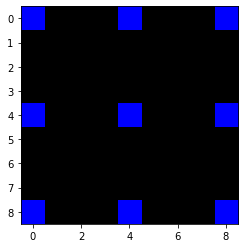

(('v', 1, 1), None)

Wall time: 3.14 ms


In [168]:
#if its one of the first three turns simply make a random move to save time
testBoard = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[],"p2":[]}
show_board(testBoard,score)
print()
%time display(alpha_beta_search_random(testBoard,"p1",score))

not known
not known


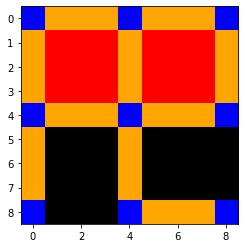

(None, 1)

Wall time: 2.99 ms


In [169]:
#if its not one of the first 3 turns it will use the alpha beta search to find optimal move
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[0,1],"p2":[]}
draw_line(board,"v",0,2)
draw_line(board,"h",0,1)
draw_line(board,"v",1,0)
draw_line(board,"h",2,1)
draw_line(board,"h",1,1)
draw_line(board,"v",1,1)
draw_line(board,"v",0,1)
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
show_board(board,score)
print()
%time display(alpha_beta_search_random(board,"p1",score))

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [170]:
wins = 0
losses = 0
draw = 0
for i in range(0,100):
    score = {"p1":[],"p2":[]}
    outcome = my_environment(alpha_beta_search,random_player,3,3,score)
    if(outcome == True):
        wins = wins + 1
    if(outcome == False):
        losses = losses + 1
    if(outcome == "Draw"):
        draw = draw + 1
print("Wins:", wins, "Losses:", losses, "Draw:", draw)

TypeError: 'NoneType' object is not subscriptable

## Task 4: Heuristic Alpha-Beta Tree Search [30 points] 

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [171]:
#my heuristic function looks at the number of boxes each player has completed and finds the difference. I then divide that
# difference by the number of possible boxes for the board
def evaluation(board,player,score):
    u = util(board, player,score)
    if u is not None: return u, True

    score_dif = len(score[player]) - len(score[other(player)])
    rows = board['n'] -1
    cols = board['m'] - 1
    poss_boxes = rows * cols
    new_util = score_dif/poss_boxes
    return new_util, False

In [172]:
testBoard = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[2],"p2":[0,1]}
draw_line(testBoard,"h",2,0)
draw_line(testBoard,"v",0,0)
draw_line(testBoard,"v",1,1)
draw_line(testBoard,"h",1,0)
draw_line(testBoard,"h",0,0)
draw_line(testBoard,"v",1,0)
draw_line(testBoard,"v",0,1)
evaluation(testBoard,"p1", score)


(1, True)

### Cutting off search 

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [175]:
# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0
def alpha_beta_heuristic(board, player,score,cutoff):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    # rows = board['n']
    # cols = board['m']
    # poss_moves = (rows * cols -rows) + (rows * cols - cols)
    # num_actions = len(actions(board))
    # if (num_actions + 2 >= poss_moves):
    # possibleMoves = actions(board)
    # action = random.choice(possibleMoves)
    # return action,None


    value, move = max_value_ab(board, player, -math.inf, +math.inf,score,0,cutoff)

    if DEBUG >= 2: print(f"Number of nodes searched: {COUNT}")

    return move, value
def max_value_ab(state, player, alpha, beta,score,depth,cutoff):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1

    # return utility of state is a terminal state
    #print(player)
    #print(score)
    v, terminal = evaluation(state, player,score)
    if((cutoff is not None and depth >= cutoff) or terminal):
        if(terminal):
            alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" )
        return v, None

    v, move = -math.inf, None
    # check all possible actions in the state, update alpha and return move with the largest value
    for a in actions(state):
        new_state = result(state, player, a,score)

        v2, a2 = min_value_ab(new_state[0], player, alpha, beta,new_state[1],depth +1,cutoff)

        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 > v:
            v, move = v2, a
        alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f" v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move

    return v, move
def min_value_ab(state, player, alpha, beta,score,depth,cutoff):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1

    # return utility of state is a terminal state

    v, terminal = evaluation(state, player,score)
    if((cutoff is not None and depth >= cutoff) or terminal):
        if(terminal):
            alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" )
        return v, None
    v, move = +math.inf, None
    # check all possible actions in the state, update beta and return move with the smallest value
    for a in actions(state):
    #print(player,'in min')

        new_state = result(state, other(player), a,score)

        v2, a2 = max_value_ab(new_state[0], player, alpha, beta,new_state[1],depth +1,cutoff)
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")

        if v2 < v:
            v, move = v2, a
        beta = min(beta, v)
        if v <= alpha:
            if DEBUG >= 2: print(f" v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move
    return v, move

not known
not known


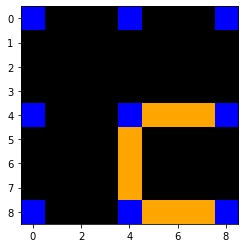

(None, 1)

Wall time: 2.99 ms


In [176]:
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[],"p2":[]}
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,4))

not known
not known


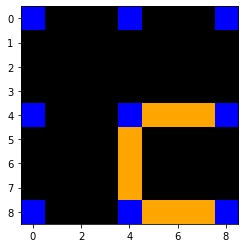

TypeError: max_value_ab() takes 5 positional arguments but 7 were given

In [266]:
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[],"p2":[]}
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,5))

not known
not known


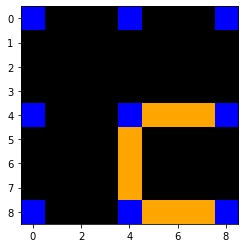

(None, 1)

Wall time: 2.99 ms


In [178]:
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[],"p2":[]}
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,10))

not known
not known


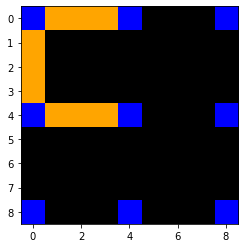

TypeError: max_value_ab() takes 5 positional arguments but 7 were given

In [271]:
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[],"p2":[]}
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,3))

not known
not known


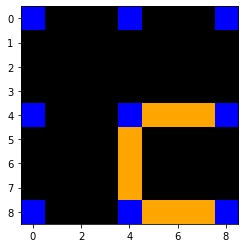

(None, 1)

Wall time: 2.99 ms


In [180]:
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[],"p2":[]}
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,2))

# I found a cutoff of 4 was effective and made moves quickly, so I decided to use that

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.

not known
not known


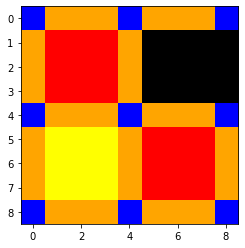

False



(None, 1)

Wall time: 1.96 ms


In [181]:
#finds winning move
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[0,3],"p2":[2]}
draw_line(board,"h",1,1)
draw_line(board,"v",1,1)
draw_line(board,"h",2,1)
draw_line(board,"v",1,2)
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
draw_line(board,"v",0,1)
draw_line(board,"v",1,0)
draw_line(board,"h",0,1)
draw_line(board,"h",2,0)
show_board(board,score)
test = isTerminal(board)
print(test)
print()
%time display(alpha_beta_heuristic(board,"p1",score,4))

not known
not known


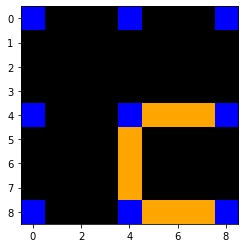

(None, 1)

Wall time: 2.99 ms


In [182]:
#finds move that completes box
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[],"p2":[]}
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,4))

not known
not known


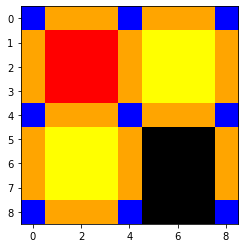

False



(None, 1)

Wall time: 2 ms


In [183]:
#finds winning move for p2
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[0],"p2":[1,2]}
draw_line(board,"h",1,1)
draw_line(board,"v",1,1)
draw_line(board,"v",1,2)
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"h",1,0)
draw_line(board,"v",0,1)
draw_line(board,"v",1,0)
draw_line(board,"h",0,1)
draw_line(board,"h",2,0)
draw_line(board,"v",0,2)
show_board(board,score)
test = isTerminal(board)
print(test)
print()
%time display(alpha_beta_heuristic(board,"p2",score,4))

not known
not known


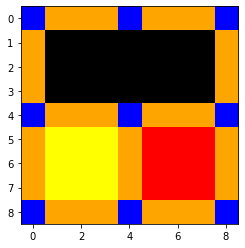

False



(None, 1)

Wall time: 2.99 ms


In [184]:
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[3],"p2":[2]}
draw_line(board,"h",1,1)
draw_line(board,"h",0,0)
draw_line(board,"v",0,0)
draw_line(board,"v",1,1)
draw_line(board,"v",1,2)
draw_line(board,"v",1,0)
draw_line(board,"h",0,1)
draw_line(board,"h",2,0)
draw_line(board,"v",0,2)
draw_line(board,"h",1,0)
draw_line(board,"h",2,1)
show_board(board,score)
test = isTerminal(board)
print(test)
print()
%time display(alpha_beta_heuristic(board,"p2",score,4))

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

not known
not known


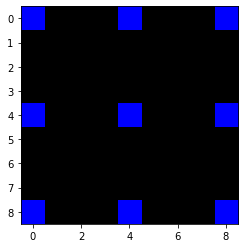

(None, 1)

Wall time: 2.99 ms


In [185]:
board = {
    'n': 3, ### hoizontal dots
    'm': 3 ### vertical dots
}
score = {"p1":[],"p2":[]}
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,4))

not known
not known


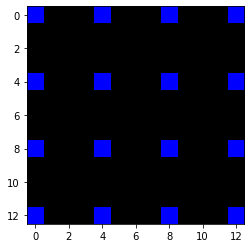

(None, 1)

Wall time: 2 ms


In [186]:
board = {
    'n': 4, ### hoizontal dots
    'm': 4 ### vertical dots
}
score = {"p1":[],"p2":[]}
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,4))

not known
not known


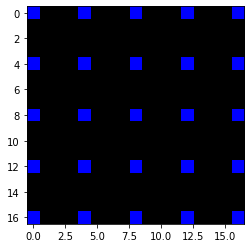

(None, 1)

Wall time: 1.99 ms


In [187]:
board = {
    'n': 5, ### hoizontal dots
    'm': 5 ### vertical dots
}
score = {"p1":[],"p2":[]}
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,4))

not known
not known


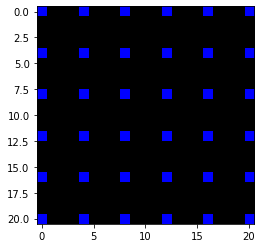

(None, 1)

Wall time: 2.66 ms


In [188]:
board = {
    'n': 6, ### hoizontal dots
    'm': 6 ### vertical dots
}
score = {"p1":[],"p2":[]}
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,4))

not known
not known


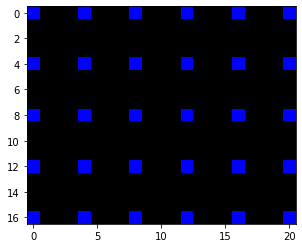

(None, 1)

Wall time: 2.99 ms


In [189]:
board = {
    'n': 5, ### hoizontal dots
    'm': 6 ### vertical dots
}
score = {"p1":[],"p2":[]}
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,4))

not known
not known


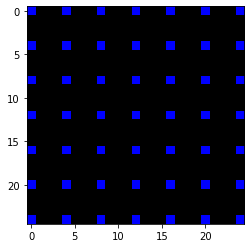

(None, 1)

Wall time: 3.99 ms


In [190]:
board = {
    'n': 7, ### hoizontal dots
    'm': 7 ### vertical dots
}
score = {"p1":[],"p2":[]}
show_board(board,score)
print()
%time display(alpha_beta_heuristic(board,"p1",score,4))

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [191]:
def new_environment(player1,player2,rows,cols,score):
    board = {
        'n': rows, ### hoizontal dots
        'm': cols ### vertical dots
    }


    currPlayer = "p1"
    while(isTerminal(board) != True):
        scoreBeforeTurn = len(score[currPlayer])
        isBoxCreated = False
        if(currPlayer == "p1"):
            currAgent = player1
            cutoff = 4
        else:
            currAgent = player2
            cutoff = 6

        action = currAgent(board,currPlayer,score,cutoff)
        #print(action)
        move = action[0]
        #print(move)
        draw_line(board,move[0],move[1],move[2])
        getScore(board,currPlayer,score)
        newScore = len(score[currPlayer])
        if(newScore == scoreBeforeTurn):
            if(currPlayer == "p1"):
                currPlayer = "p2"
            else:
                currPlayer = "p1"
        else:
            currPlayer = currPlayer
        show_board(board,score)
    outcome = isWin(board,"p1",score)
    return outcome

In [192]:
#p1 has cutoff of 4 and p2 has cutoff of 6
score = {"p1":[],"p2":[]}
outcome = new_environment(alpha_beta_heuristic,alpha_beta_heuristic,4,4,score)
if(outcome == True):
    print("p1 wins!")
if(outcome == False):
    print("p2 wins!")
if(outcome == "Draw"):
    print("Draw!")


TypeError: 'NoneType' object is not subscriptable

## Tournament task [+1 to 5% bonus on your course grade; will be assigned separately]

Find another student and let your best agent play against the other student's best player. You are allowed to use any improvements you like as long as you code it yourself. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search (see [tic-tac-toe-example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_pure_monte_carlo_search.ipynb)) and investigate how this search performs on the test boards that you have used above. 

In [20]:
# Your code/ answer goes here.

### Best First Move

How would you determine what the best first move for a standard board ($5 \times 5$) is? You can use Pure Monte Carlo Search or any algorithms that you have implemented above.

In [21]:
# Your code/ answer goes here.